<a href="https://colab.research.google.com/github/sethhardik/SHALA2020/blob/master/Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

### NOTE TO SELF :
In Grid Search, we try every combination of a preset list of values of the hyper-parameters and choose the best combination based on the cross validation score.

Random search tries random combinations of a range of values (we have to define the number iterations). It is good in testing a wide range of values and normally it reaches a very good combination very fast, but the problem that it doesn’t guarantee to give the best parameters combination.

On the other hand, Grid search will give the best combination but it can take a lot of time.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix,roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

## `nan management` 

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
titanic_data=titanic_data.drop(["Cabin"],axis=1)
titanic_data["Age"]=titanic_data["Age"].fillna(titanic_data["Age"].mean())
titanic_data=titanic_data.dropna()  # dropping the last 2 nan in the data
print(titanic_data.isna().sum())
print(titanic_data.shape)
titanic_data.head()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
(889, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## `X` and `Y` split

In [6]:
X=titanic_data.drop("Survived",axis=1)
Y=titanic_data.Survived
print(X.shape)
print(Y.shape)

(889, 10)
(889,)


In [7]:
X=X.drop(["Ticket","Name","PassengerId"],axis=1)     # removing not important columns
titanic_data=titanic_data.drop(["Ticket","Name","PassengerId"],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## feature selection using heatmap


[]

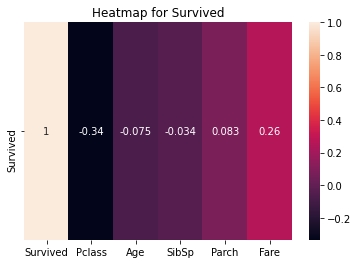

In [8]:
data_corr=titanic_data.corr()
sns.heatmap(data_corr.iloc[0:].head(1),annot=True)
plt.title("Heatmap for Survived")
plt.plot()

## feature selection for categorical data


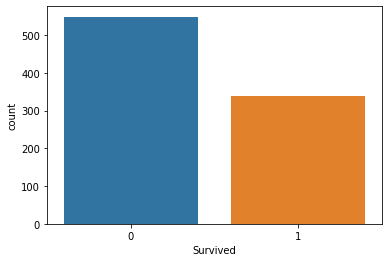

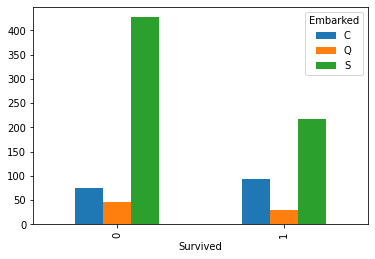

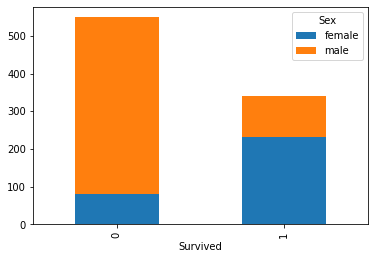

In [9]:
sns.countplot(Y)
plt.show()
cross=pd.crosstab(titanic_data["Survived"],titanic_data["Embarked"])        
cross.plot.bar()
plt.show()
cross1=pd.crosstab(titanic_data["Survived"],titanic_data["Sex"])        
cross1.plot.bar(stacked=True)
plt.show()

#` handling categorical dataset `

In [10]:
sex = pd.get_dummies(X.Sex,drop_first=True,prefix="Sex")
embarked = pd.get_dummies(X.Embarked,drop_first=True,prefix="Embarked")
X=pd.concat([X,sex,embarked],axis=1)
X=X.drop(["Sex","Embarked"],axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [11]:
X.shape

(889, 8)

As we are asked to use tree based models on our dataset it's not necessary to `normalize` the data. `Hence skipping it`.

##`Machine Learning`

In [12]:
# splitting data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=125,stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 8)
(178, 8)
(711,)
(178,)


## `random forest classifier`

testing accuracy: 0.8314606741573034
training accuracy: 0.980309423347398
[[93 17]
 [13 55]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       110
           1       0.76      0.81      0.79        68

    accuracy                           0.83       178
   macro avg       0.82      0.83      0.82       178
weighted avg       0.83      0.83      0.83       178



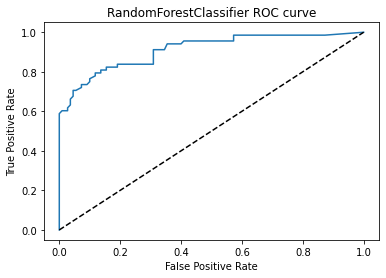

In [13]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)
print("testing accuracy:",accuracy_score(y_test,predict))
print("training accuracy:",accuracy_score(y_train,rfc.predict(x_train)))
print(confusion_matrix(y_test,predict))
print("Classification report:\n",classification_report(y_test,predict))

# roc curve 
probs = rfc.predict_proba(x_test)  
probs = probs[:, 1]   
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
plt.show()

###  k fold method 


Individual Score: [0.73033708 0.82022472 0.75280899 0.80898876 0.87640449 0.84269663
 0.79775281 0.75280899 0.84269663 0.85227273]
Mean Score: 80.76991828396322 %


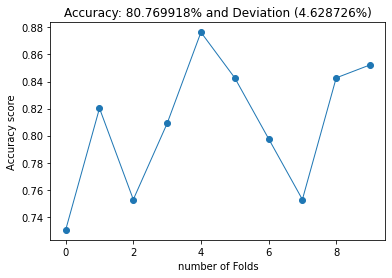

In [14]:
score=cross_val_score(rfc,X,Y,cv=10)
print("Individual Score:",score)
print("Mean Score:",score.mean()*100,"%")
# plot
plt.plot(np.arange(10), score, 'o-', linewidth=1)
plt.title("Accuracy: %f%% and Deviation (%f%%)" % (score.mean()*100, score.std()*100))
plt.xlabel('number of Folds')
plt.ylabel('Accuracy score')
plt.show()

### `grid search for hyperparameters`


In [0]:
# parameters={
#     'n_estimators'      : [100,200,320,330,340,50],
#     'max_depth'         : [8, 9, 10, 11, 12,15],
#     'random_state'      : [0,1,5,100],
#     'bootstrap'         : [True,False]
# }
# rfc_new=RandomForestClassifier()
# grid_search=GridSearchCV(
#     estimator=rfc_new,
#     param_grid=parameters,
#     scoring="roc_auc",
#     n_jobs=-1,
#     cv=10,
#     verbose=True
# )
# grid_search.fit(x_train,y_train)

# best_params = grid_search.best_params_
# best_params

#### after gridsearch 

testing accuracy: 0.8370786516853933
training accuracy: 0.909985935302391
[[101   9]
 [ 20  48]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        68

    accuracy                           0.84       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178



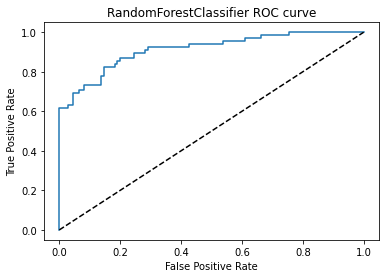

In [16]:
rfc_hyper=RandomForestClassifier(max_depth= 8, n_estimators= 330, random_state= 1)
rfc_hyper.fit(x_train,y_train)
predict=rfc_hyper.predict(x_test)
print("testing accuracy:",accuracy_score(y_test,predict))
print("training accuracy:",accuracy_score(y_train,rfc_hyper.predict(x_train)))
print(confusion_matrix(y_test,predict))
print("Classification report:\n",classification_report(y_test,predict))

# roc curve 
probs = rfc_hyper.predict_proba(x_test)  
probs = probs[:, 1]   
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
plt.show()

## `Decision Tree`

testing accuracy: 0.7865168539325843
training accuracy: 0.980309423347398
[[92 18]
 [20 48]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        68

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



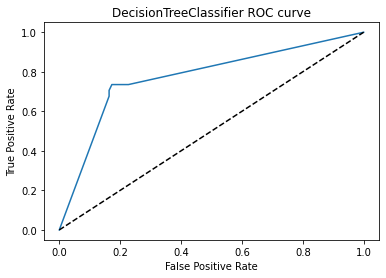

In [17]:
# Decision tree classifier
dectree=DecisionTreeClassifier()
dectree.fit(x_train,y_train)
predict=dectree.predict(x_test)
print("testing accuracy:",accuracy_score(y_test,predict))
print("training accuracy:",accuracy_score(y_train,dectree.predict(x_train)))
print(confusion_matrix(y_test,predict))
print("Classification report:\n",classification_report(y_test,predict))

# roc curve 

probs = dectree.predict_proba(x_test)  
probs = probs[:, 1]   
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier ROC curve')
plt.show()

## `XGB Classifier `

testing accuracy: 0.8651685393258427
training accuracy: 0.890295358649789
[[104   6]
 [ 18  50]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       110
           1       0.89      0.74      0.81        68

    accuracy                           0.87       178
   macro avg       0.87      0.84      0.85       178
weighted avg       0.87      0.87      0.86       178



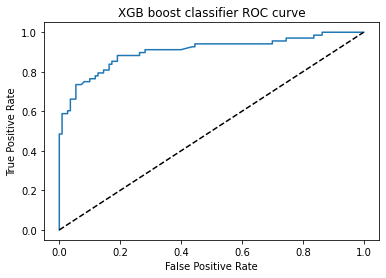

In [18]:
# xgbboost classifier
xgb=XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators=360) # using previously calculated hyperparameter
xgb.fit(x_train,y_train)
predict=xgb.predict(x_test)
print("testing accuracy:",accuracy_score(y_test,predict))
print("training accuracy:",accuracy_score(y_train,xgb.predict(x_train)))
print(confusion_matrix(y_test,predict))
print("Classification report:\n",classification_report(y_test,predict))

# roc curve 

probs = xgb.predict_proba(x_test)  
probs = probs[:, 1]   
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB boost classifier ROC curve')
plt.show()

###  k fold method 


Individual Score: [0.78089888 0.8258427  0.85955056 0.80337079 0.83615819]
Mean Score: 82.11642226877422 %


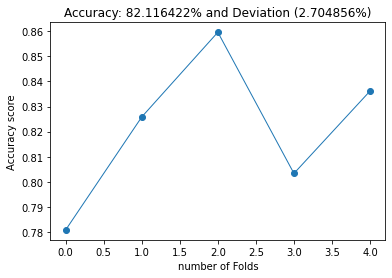

In [19]:
score=cross_val_score(xgb,X,Y,cv=5)
print("Individual Score:",score)
print("Mean Score:",score.mean()*100,"%")
# plot
plt.plot(np.arange(5), score, 'o-', linewidth=1)
plt.title("Accuracy: %f%% and Deviation (%f%%)" % (score.mean()*100, score.std()*100))
plt.xlabel('number of Folds')
plt.ylabel('Accuracy score')
plt.show()

### `grid search for hyperparameters`

In [0]:
# parameter={
#     "max_depth": range(2,10,1),
#     "learning_rate":[0.1,0.01,0.5],
#     "n_estimators": range(60,440,60)
# }
# xgb_class_new=XGBClassifier()
# grid_search=GridSearchCV(
#     estimator=xgb_class_new,
#     param_grid=parameter,
#     scoring="roc_auc",
#     n_jobs=-1,
#     cv=10,
#     verbose=True
# )
# grid_search.fit(x_train,y_train)
# best_params = grid_search.best_params_
# best_params

### after grid search

testing accuracy: 0.8146067415730337
training accuracy: 0.8340365682137834
[[99 11]
 [22 46]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        68

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



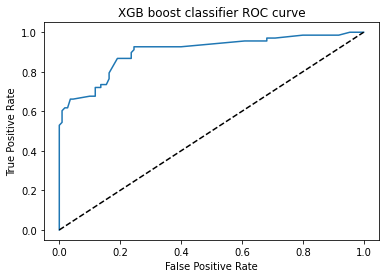

In [21]:
xgb=XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=240) # using previously calculated hyperparameter
xgb.fit(x_train,y_train)
predict=xgb.predict(x_test)
print("testing accuracy:",accuracy_score(y_test,predict))
print("training accuracy:",accuracy_score(y_train,xgb.predict(x_train)))
print(confusion_matrix(y_test,predict))
print("Classification report:\n",classification_report(y_test,predict))

# roc curve 

probs = xgb.predict_proba(x_test)  
probs = probs[:, 1]   
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB boost classifier ROC curve')
plt.show()

## `Adaboost Classifier`

ROC AUC score: 0.85
testing accuracy: 0.8089887640449438
training accuracy: 0.980309423347398
[[103   7]
 [ 22  46]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.74      0.76      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



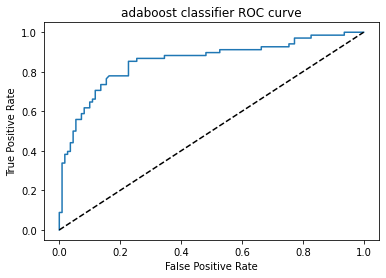

In [30]:
dt = DecisionTreeClassifier( random_state=1)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

adb_clf.fit(x_train, y_train)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(x_test)[:,1]
pred=adb_clf.predict(x_test)
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))
print("testing accuracy:",accuracy_score(y_test,pred))
print("training accuracy:",accuracy_score(y_train,adb_clf.predict(x_train)))
print(confusion_matrix(y_test,predict))
print("Classification report:\n",classification_report(y_test,pred))

# plot
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('adaboost classifier ROC curve')
plt.show()

### `GradientBoostingClassifier `

testing accuracy: 0.8370786516853933
training accuracy: 0.9437412095639943
[[103   7]
 [ 22  46]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       110
           1       0.87      0.68      0.76        68

    accuracy                           0.84       178
   macro avg       0.85      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178

ROC AUC score: 0.90


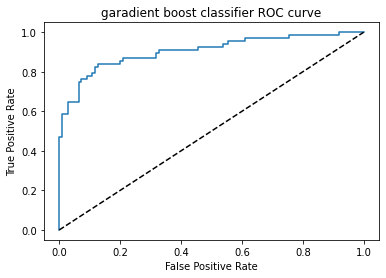

In [23]:
gbc=GradientBoostingClassifier(n_estimators=300)
gbc.fit(x_train,y_train)
predict=gbc.predict(x_test)
y_pred_proba = gbc.predict_proba(x_test)[:,1]
gbc_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

print("testing accuracy:",accuracy_score(y_test,predict))
print("training accuracy:",accuracy_score(y_train,gbc.predict(x_train)))
print(confusion_matrix(y_test,predict))
print("Classification report:\n",classification_report(y_test,predict))
print('ROC AUC score: {:.2f}'.format(gbc_roc_auc_score))
# plot
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('garadient boost classifier ROC curve')
plt.show()

### `BaggingClassifier`

testing accuracy: 0.848314606741573
training accuracy: 0.980309423347398
[[100  10]
 [ 17  51]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.75      0.79        68

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

ROC AUC score: 0.91


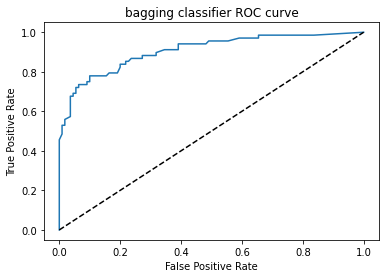

In [24]:
dt=DecisionTreeClassifier()

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 
bc.fit(x_train, y_train)
y_pred = bc.predict(x_test)
y_pred_proba = bc.predict_proba(x_test)[:,1]
bc_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

print("testing accuracy:",accuracy_score(y_test,y_pred))
print("training accuracy:",accuracy_score(y_train,bc.predict(x_train)))
print(confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
print('ROC AUC score: {:.2f}'.format(bc_roc_auc_score))
# plot
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('bagging classifier ROC curve')
plt.show()

### K fold

Individual Score: [0.75280899 0.78651685 0.76404494 0.85393258 0.8988764  0.83146067
 0.80898876 0.76404494 0.86516854 0.84090909]
Mean Score: 81.66751787538304 %


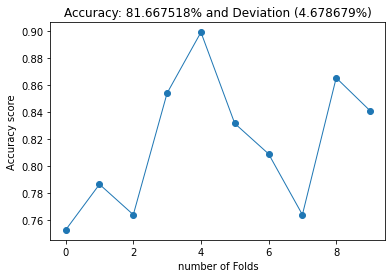

In [25]:
score=cross_val_score(bc,X,Y,cv=10)
print("Individual Score:",score)
print("Mean Score:",score.mean()*100,"%")
# plot
plt.plot(np.arange(10), score, 'o-', linewidth=1)
plt.title("Accuracy: %f%% and Deviation (%f%%)" % (score.mean()*100, score.std()*100))
plt.xlabel('number of Folds')
plt.ylabel('Accuracy score')
plt.show()

## feature importance using random *forest*


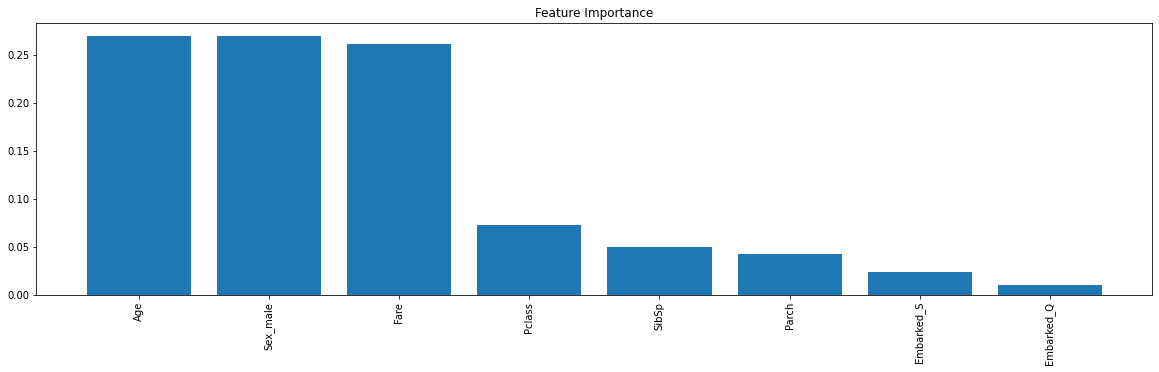

In [26]:
rfc1=RandomForestClassifier(n_estimators=300)
model=rfc1.fit(x_train,y_train)
# calculated by out of bag data while baaging in randomforest.
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize=(20,5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# max accuracy without overfitting is given by Xgboost classifier